In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras 
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train,Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 Images
Test data = 10000 Images
Image dimension -->28 x 28
grayscale image-1 channel

In [ ]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


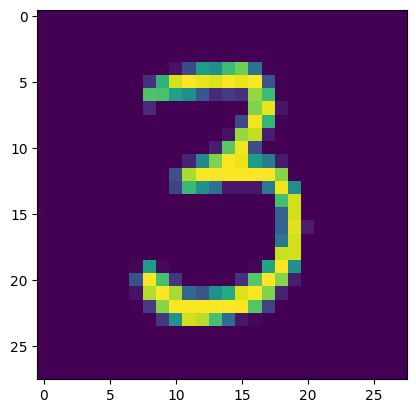

3


In [ ]:
#displaying the image
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(Y_train[50])

In [ ]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use this labels as such or we can also apply one hot encoding

All the images has same dimensions in this dataset, If not we have to resize to the same dimension

In [ ]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [ ]:
#printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [ ]:
# setting up the layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])

In [ ]:
#compiling the neural network
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
              

In [ ]:
#training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1421 - accuracy: 0.9573
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1067 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0846 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0709 - accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0599 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0524 - accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466 - accuracy: 0.9851
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0407 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.032

Training data accuracy is 98.95%

Accuracy on test data

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9764
0.9764000177383423


Test data accuracy is 97%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


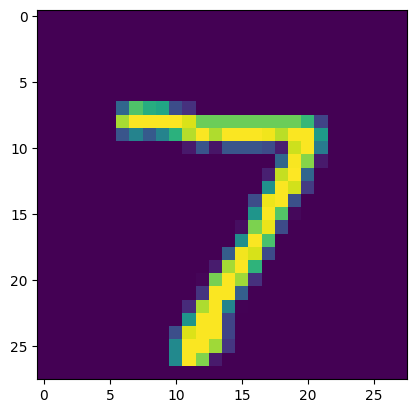

In [ ]:
#first data point in test data
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[1.9815256e-05 3.8344555e-03 2.3363400e-01 4.3424103e-01 1.2444187e-06
 2.3862419e-03 5.9731900e-11 9.9998492e-01 6.4684998e-04 4.2576961e-02]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
#converting the prediction probabilities to class label
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
#converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[1.9815256e-05 3.8344555e-03 2.3363400e-01 ... 9.9998492e-01
  6.4684998e-04 4.2576961e-02]
 [1.8109464e-05 1.7154702e-03 9.9999982e-01 ... 1.3435431e-07
  7.2031431e-02 6.3688998e-12]
 [1.1892485e-05 9.9935317e-01 1.3371353e-01 ... 4.4676220e-01
  3.8460676e-02 8.2342728e-04]
 ...
 [6.2888674e-08 1.2293472e-02 1.8553643e-02 ... 5.9824903e-02
  1.2625253e-02 8.4403086e-01]
 [5.4278325e-06 5.4238640e-06 1.8019938e-08 ... 5.0256532e-02
  9.6269917e-01 1.0068669e-06]
 [2.8438170e-03 6.0029257e-09 1.1126177e-02 ... 5.4053077e-12
  1.9079062e-06 9.4433399e-06]]


Y_test - True labels
Y_pred_labels - predicted labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)


In [ ]:
print(conf_mat)

tf.Tensor(
[[ 965    1    1    2    1    2    4    3    1    0]
 [   0 1131    1    1    0    1    0    0    1    0]
 [   6    0 1007    4    1    0    2    8    3    1]
 [   1    0    4  980    0   14    0    5    1    5]
 [   0    1    2    0  963    2    4    2    3    5]
 [   2    1    0    7    0  878    2    0    2    0]
 [   2    3    3    2    4    4  939    0    1    0]
 [   1    5   13    3    2    0    0 1000    1    3]
 [   3    0    6   10    4    6    0    4  940    1]
 [   4    3    2    5   12   11    1    8    3  960]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

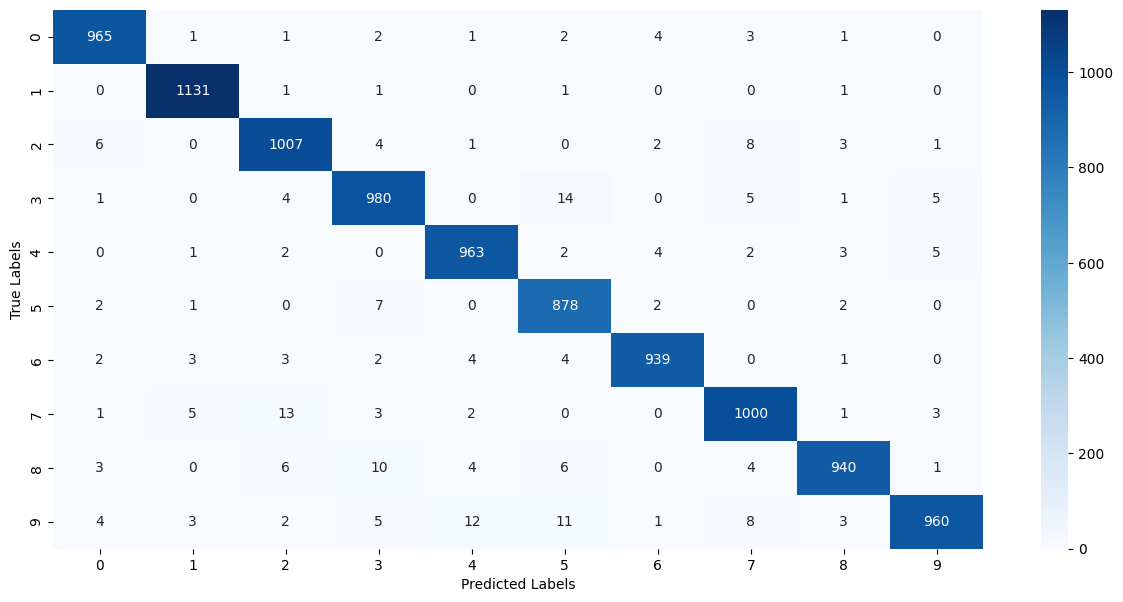

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a predictive system

In [ ]:
input_image_path =''